In [12]:
from sklearn.preprocessing import PolynomialFeatures

import os, mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X,y=mglearn.datasets.make_wave(n_samples=100)
line=np.linspace(-3,3,1000,endpoint=False).reshape(-1,1)

poly=PolynomialFeatures(degree=10,include_bias=False)
X_poly=poly.fit_transform(X)

print(X_poly.shape)


(100, 10)


In [7]:
print(X[:5])
print(X_poly[:5])

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
[[ -7.52759287e-01   5.66646544e-01  -4.26548448e-01   3.21088306e-01
   -2.41702204e-01   1.81943579e-01  -1.36959719e-01   1.03097700e-01
   -7.76077513e-02   5.84199555e-02]
 [  2.70428584e+00   7.31316190e+00   1.97768801e+01   5.34823369e+01
    1.44631526e+02   3.91124988e+02   1.05771377e+03   2.86036036e+03
    7.73523202e+03   2.09182784e+04]
 [  1.39196365e+00   1.93756281e+00   2.69701700e+00   3.75414962e+00
    5.22563982e+00   7.27390068e+00   1.01250053e+01   1.40936394e+01
    1.96178338e+01   2.73073115e+01]
 [  5.91950905e-01   3.50405874e-01   2.07423074e-01   1.22784277e-01
    7.26822637e-02   4.30243318e-02   2.54682921e-02   1.50759786e-02
    8.92423917e-03   5.28271146e-03]
 [ -2.06388816e+00   4.25963433e+00  -8.79140884e+00   1.81444846e+01
   -3.74481869e+01   7.72888694e+01  -1.59515582e+02   3.29222321e+02
   -6.79478050e+02   1.40236670e+03]]


In [10]:
print(poly.get_feature_names())

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


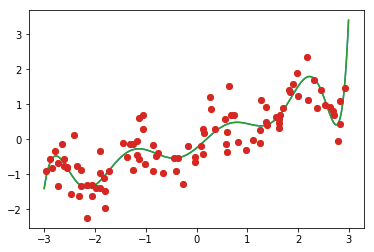

In [14]:
reg=LinearRegression().fit(X_poly,y)
line_poly=poly.transform(line)

plt.plot(line,reg.predict(line_poly))
plt.plot(X[:,0],y,'o')
plt.show()

In [24]:
print(line_poly.shape)

(1000, 10)


In [23]:
print(reg.predict(line_poly).shape)

(1000,)


In [25]:
print(reg.predict(line_poly)[0])

-1.40023358827


In [26]:
print(line_poly[0])

[ -3.00000000e+00   9.00000000e+00  -2.70000000e+01   8.10000000e+01
  -2.43000000e+02   7.29000000e+02  -2.18700000e+03   6.56100000e+03
  -1.96830000e+04   5.90490000e+04]


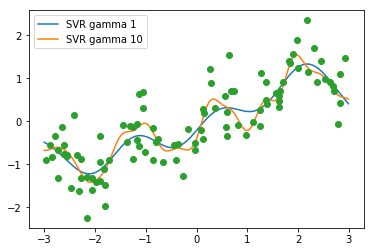

In [32]:
#compare to linearSVM

from sklearn.svm import SVR

for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line,svr.predict(line),label=('SVR gamma {}'.format(gamma)))
plt.plot(X[:,0],y,'o')
plt.legend(loc='best')
plt.show()

In [33]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

boston=load_boston()
X_train,X_test,y_train,y_test=train_test_split(boston.data,boston.target,random_state=0)
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [34]:
poly=PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly=poly.fit_transform(X_train_scaled)
X_test_poly=poly.transform(X_test_scaled)
print(X_train.shape)
print(X_train_poly.shape)

(379, 13)
(379, 105)


In [35]:
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [36]:
#note the bias features

In [39]:
from sklearn.linear_model import Ridge
ridge=Ridge().fit(X_train_scaled,y_train)
print(ridge.score(X_train_scaled,y_train))
print(ridge.score(X_test_scaled,y_test))

0.765630439548
0.621370140845


In [40]:
ridge=Ridge().fit(X_train_poly,y_train)
print(ridge.score(X_train_poly,y_train))
print(ridge.score(X_test_poly,y_test))

0.886824927334
0.753423384805


In [41]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100).fit(X_train_scaled,y_train)
print(rf.score(X_train_scaled,y_train))
print(rf.score(X_test_scaled,y_test))

0.982976509196
0.803405421789


In [42]:
rf=RandomForestRegressor(n_estimators=100).fit(X_train_poly,y_train)
print(rf.score(X_train_poly,y_train))
print(rf.score(X_test_poly,y_test))

0.987151599795
0.764147635209


In [43]:
#note that even without additional forest, RF beats ridge. Adding features actually decreases performance